In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test_x.csv")

In [3]:
train.head(1)

,index,Cinsiyet,Yaş Grubu,Medeni Durum,Eğitim Düzeyi,İstihdam Durumu,Yıllık Ortalama Gelir,Yaşadığı Şehir,En Çok İlgilendiği Ürün Grubu,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Eğitime Devam Etme Durumu,Öbek İsmi,Yıllık Ortalama Sepete Atılan Ürün Adedi
0,0,Kadın,31-40,Bekar,Yüksek Lisans Mezunu,Düzenli ve Ücretli Bir İşi Var,748266.440879,Büyük Şehir,Elektronik ve Teknolojik Ürünler,32010.900881,37.310644,Etmiyor,obek_4,102.936904


In [4]:
test.head(1)

,index,Cinsiyet,Yaş Grubu,Medeni Durum,Eğitim Düzeyi,İstihdam Durumu,Yıllık Ortalama Gelir,Yaşadığı Şehir,En Çok İlgilendiği Ürün Grubu,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Eğitime Devam Etme Durumu,Yıllık Ortalama Sepete Atılan Ürün Adedi
0,0,Erkek,51-60,Evli,Yüksek Lisans Mezunu,Düzenli ve Ücretli Bir İşi Var,365331.930346,Köy veya Kasaba,Giyim,5566.587664,15.442635,Etmiyor,19.64646


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5460 entries, 0 to 5459
Data columns (total 14 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   index                                       5460 non-null   int64  
 1   Cinsiyet                                    5460 non-null   object 
 2   Yaş Grubu                                   5460 non-null   object 
 3   Medeni Durum                                5460 non-null   object 
 4   Eğitim Düzeyi                               5460 non-null   object 
 5   İstihdam Durumu                             5460 non-null   object 
 6   Yıllık Ortalama Gelir                       5460 non-null   float64
 7   Yaşadığı Şehir                              5460 non-null   object 
 8   En Çok İlgilendiği Ürün Grubu               5460 non-null   object 
 9   Yıllık Ortalama Satın Alım Miktarı          5460 non-null   float64
 10  Yıllık Ortal

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 13 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   index                                       2340 non-null   int64  
 1   Cinsiyet                                    2340 non-null   object 
 2   Yaş Grubu                                   2340 non-null   object 
 3   Medeni Durum                                2340 non-null   object 
 4   Eğitim Düzeyi                               2340 non-null   object 
 5   İstihdam Durumu                             2340 non-null   object 
 6   Yıllık Ortalama Gelir                       2340 non-null   float64
 7   Yaşadığı Şehir                              2340 non-null   object 
 8   En Çok İlgilendiği Ürün Grubu               2340 non-null   object 
 9   Yıllık Ortalama Satın Alım Miktarı          2340 non-null   float64
 10  Yıllık Ortal

In [7]:
for col in train.columns[1:]:
    print(col)
    print(train[col].value_counts())

Cinsiyet
Erkek    2964
Kadın    2496
Name: Cinsiyet, dtype: int64
Yaş Grubu
18-30    1841
31-40    1477
51-60     861
41-50     727
>60       554
Name: Yaş Grubu, dtype: int64
Medeni Durum
Evli     2834
Bekar    2626
Name: Medeni Durum, dtype: int64
Eğitim Düzeyi
Lise Mezunu             1388
Üniversite Mezunu       1257
Yüksekokul Mezunu        588
Yüksek Lisans Mezunu     545
İlkokul Mezunu           417
Ortaokul Mezunu          412
Eğitimsiz                381
Doktora Mezunu           263
Doktora Ötesi            209
Name: Eğitim Düzeyi, dtype: int64
İstihdam Durumu
Düzenli ve Ücretli Bir İşi Var    2768
İşsiz veya Düzenli Bir İşi Yok    1349
Kendi İşinin Sahibi                879
Emekli                             464
Name: İstihdam Durumu, dtype: int64
Yıllık Ortalama Gelir
748266.440879    1
183304.185543    1
478631.648786    1
317370.588075    1
478148.301874    1
                ..
429862.385124    1
169362.599127    1
215232.695860    1
452868.996023    1
276155.078333    1
Na

In [8]:
np.array(train["Öbek İsmi"].value_counts().index)

array(['obek_4', 'obek_8', 'obek_5', 'obek_3', 'obek_7', 'obek_1',
       'obek_6', 'obek_2'], dtype=object)

In [9]:
X = train.drop("Öbek İsmi", axis = 1)
y = train["Öbek İsmi"]

In [10]:
X

,index,Cinsiyet,Yaş Grubu,Medeni Durum,Eğitim Düzeyi,İstihdam Durumu,Yıllık Ortalama Gelir,Yaşadığı Şehir,En Çok İlgilendiği Ürün Grubu,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Eğitime Devam Etme Durumu,Yıllık Ortalama Sepete Atılan Ürün Adedi
0,0,Kadın,31-40,Bekar,Yüksek Lisans Mezunu,Düzenli ve Ücretli Bir İşi Var,748266.440879,Büyük Şehir,Elektronik ve Teknolojik Ürünler,32010.900881,37.310644,Etmiyor,102.936904
1,1,Erkek,>60,Evli,Lise Mezunu,Kendi İşinin Sahibi,246298.609605,Küçük Şehir,Spor Malzemeleri,4145.729891,11.554851,Etmiyor,82.176053
2,2,Erkek,18-30,Bekar,Lise Mezunu,Düzenli ve Ücretli Bir İşi Var,268582.732360,Küçük Şehir,Giyim,9924.379414,55.353236,Ediyor,141.661426
3,3,Erkek,51-60,Evli,Lise Mezunu,Kendi İşinin Sahibi,327721.837865,Kırsal,Giyim,6417.780714,15.417239,Etmiyor,17.097397
4,4,Erkek,31-40,Evli,Ortaokul Mezunu,İşsiz veya Düzenli Bir İşi Yok,397431.626948,Büyük Şehir,Giyim,7886.663061,14.689837,Etmiyor,20.470459
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5455,5455,Kadın,>60,Bekar,Üniversite Mezunu,Emekli,478054.247819,Köy veya Kasaba,Kozmetik,43182.299801,31.356284,Etmiyor,51.600436
5456,5456,Erkek,51-60,Evli,Doktora Ötesi,Kendi İşinin Sahibi,481852.853651,Köy veya Kasaba,Ev ve Mobilya,42107.996193,26.288620,Etmiyor,49.190536
5457,5457,Kadın,51-60,Evli,İlkokul Mezunu,Düzenli ve Ücretli Bir İşi Var,309443.687351,Küçük Şehir,Ev ve Mobilya,4655.392445,5.156906,Etmiyor,9.537384
5458,5458,Kadın,18-30,Bekar,Yüksekokul Mezunu,Düzenli ve Ücretli Bir İşi Var,266604.268016,Büyük Şehir,Ev ve Mobilya,9016.165906,39.205399,Ediyor,143.281718


In [11]:
categoric_col = X.select_dtypes(include=['object'])

In [12]:
categoric_col.head(1)

,Cinsiyet,Yaş Grubu,Medeni Durum,Eğitim Düzeyi,İstihdam Durumu,Yaşadığı Şehir,En Çok İlgilendiği Ürün Grubu,Eğitime Devam Etme Durumu
0,Kadın,31-40,Bekar,Yüksek Lisans Mezunu,Düzenli ve Ücretli Bir İşi Var,Büyük Şehir,Elektronik ve Teknolojik Ürünler,Etmiyor


In [13]:
categoric_col = pd.get_dummies(categoric_col, columns = ["Cinsiyet"],drop_first = True)

In [14]:
categoric_col.head(1)

,Yaş Grubu,Medeni Durum,Eğitim Düzeyi,İstihdam Durumu,Yaşadığı Şehir,En Çok İlgilendiği Ürün Grubu,Eğitime Devam Etme Durumu,Cinsiyet_Kadın
0,31-40,Bekar,Yüksek Lisans Mezunu,Düzenli ve Ücretli Bir İşi Var,Büyük Şehir,Elektronik ve Teknolojik Ürünler,Etmiyor,1


In [15]:
categoric_col = pd.get_dummies(categoric_col, columns = ["Yaş Grubu"],drop_first = True)
categoric_col.head(1)

,Medeni Durum,Eğitim Düzeyi,İstihdam Durumu,Yaşadığı Şehir,En Çok İlgilendiği Ürün Grubu,Eğitime Devam Etme Durumu,Cinsiyet_Kadın,Yaş Grubu_31-40,Yaş Grubu_41-50,Yaş Grubu_51-60,Yaş Grubu_>60
0,Bekar,Yüksek Lisans Mezunu,Düzenli ve Ücretli Bir İşi Var,Büyük Şehir,Elektronik ve Teknolojik Ürünler,Etmiyor,1,1,0,0,0


In [16]:
categoric_col = pd.get_dummies(categoric_col, columns = ["Medeni Durum"],drop_first = True)
categoric_col.head(1)

,Eğitim Düzeyi,İstihdam Durumu,Yaşadığı Şehir,En Çok İlgilendiği Ürün Grubu,Eğitime Devam Etme Durumu,Cinsiyet_Kadın,Yaş Grubu_31-40,Yaş Grubu_41-50,Yaş Grubu_51-60,Yaş Grubu_>60,Medeni Durum_Evli
0,Yüksek Lisans Mezunu,Düzenli ve Ücretli Bir İşi Var,Büyük Şehir,Elektronik ve Teknolojik Ürünler,Etmiyor,1,1,0,0,0,0


In [17]:
categoric_col = pd.get_dummies(categoric_col, columns = ["Eğitim Düzeyi"],drop_first = True)
categoric_col.head(1)

,İstihdam Durumu,Yaşadığı Şehir,En Çok İlgilendiği Ürün Grubu,Eğitime Devam Etme Durumu,Cinsiyet_Kadın,Yaş Grubu_31-40,Yaş Grubu_41-50,Yaş Grubu_51-60,Yaş Grubu_>60,Medeni Durum_Evli,Eğitim Düzeyi_Doktora Ötesi,Eğitim Düzeyi_Eğitimsiz,Eğitim Düzeyi_Lise Mezunu,Eğitim Düzeyi_Ortaokul Mezunu,Eğitim Düzeyi_Yüksek Lisans Mezunu,Eğitim Düzeyi_Yüksekokul Mezunu,Eğitim Düzeyi_Üniversite Mezunu,Eğitim Düzeyi_İlkokul Mezunu
0,Düzenli ve Ücretli Bir İşi Var,Büyük Şehir,Elektronik ve Teknolojik Ürünler,Etmiyor,1,1,0,0,0,0,0,0,0,0,1,0,0,0


In [18]:
categoric_col = pd.get_dummies(categoric_col, columns = ["İstihdam Durumu"],drop_first = True)
categoric_col.head(1)

,Yaşadığı Şehir,En Çok İlgilendiği Ürün Grubu,Eğitime Devam Etme Durumu,Cinsiyet_Kadın,Yaş Grubu_31-40,Yaş Grubu_41-50,Yaş Grubu_51-60,Yaş Grubu_>60,Medeni Durum_Evli,Eğitim Düzeyi_Doktora Ötesi,Eğitim Düzeyi_Eğitimsiz,Eğitim Düzeyi_Lise Mezunu,Eğitim Düzeyi_Ortaokul Mezunu,Eğitim Düzeyi_Yüksek Lisans Mezunu,Eğitim Düzeyi_Yüksekokul Mezunu,Eğitim Düzeyi_Üniversite Mezunu,Eğitim Düzeyi_İlkokul Mezunu,İstihdam Durumu_Emekli,İstihdam Durumu_Kendi İşinin Sahibi,İstihdam Durumu_İşsiz veya Düzenli Bir İşi Yok
0,Büyük Şehir,Elektronik ve Teknolojik Ürünler,Etmiyor,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [19]:
categoric_col = pd.get_dummies(categoric_col, columns = ["Yaşadığı Şehir"],drop_first = True)
categoric_col.head(1)

,En Çok İlgilendiği Ürün Grubu,Eğitime Devam Etme Durumu,Cinsiyet_Kadın,Yaş Grubu_31-40,Yaş Grubu_41-50,Yaş Grubu_51-60,Yaş Grubu_>60,Medeni Durum_Evli,Eğitim Düzeyi_Doktora Ötesi,Eğitim Düzeyi_Eğitimsiz,...,Eğitim Düzeyi_Yüksek Lisans Mezunu,Eğitim Düzeyi_Yüksekokul Mezunu,Eğitim Düzeyi_Üniversite Mezunu,Eğitim Düzeyi_İlkokul Mezunu,İstihdam Durumu_Emekli,İstihdam Durumu_Kendi İşinin Sahibi,İstihdam Durumu_İşsiz veya Düzenli Bir İşi Yok,Yaşadığı Şehir_Köy veya Kasaba,Yaşadığı Şehir_Küçük Şehir,Yaşadığı Şehir_Kırsal
0,Elektronik ve Teknolojik Ürünler,Etmiyor,1,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [20]:
categoric_col = pd.get_dummies(categoric_col, columns = ["En Çok İlgilendiği Ürün Grubu"],drop_first = True)
categoric_col.head(1)

,Eğitime Devam Etme Durumu,Cinsiyet_Kadın,Yaş Grubu_31-40,Yaş Grubu_41-50,Yaş Grubu_51-60,Yaş Grubu_>60,Medeni Durum_Evli,Eğitim Düzeyi_Doktora Ötesi,Eğitim Düzeyi_Eğitimsiz,Eğitim Düzeyi_Lise Mezunu,...,İstihdam Durumu_Emekli,İstihdam Durumu_Kendi İşinin Sahibi,İstihdam Durumu_İşsiz veya Düzenli Bir İşi Yok,Yaşadığı Şehir_Köy veya Kasaba,Yaşadığı Şehir_Küçük Şehir,Yaşadığı Şehir_Kırsal,En Çok İlgilendiği Ürün Grubu_Ev ve Mobilya,En Çok İlgilendiği Ürün Grubu_Giyim,En Çok İlgilendiği Ürün Grubu_Kozmetik,En Çok İlgilendiği Ürün Grubu_Spor Malzemeleri
0,Etmiyor,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
categoric_col = pd.get_dummies(categoric_col, columns = ["Eğitime Devam Etme Durumu"],drop_first = True)
categoric_col.head(1)

,Cinsiyet_Kadın,Yaş Grubu_31-40,Yaş Grubu_41-50,Yaş Grubu_51-60,Yaş Grubu_>60,Medeni Durum_Evli,Eğitim Düzeyi_Doktora Ötesi,Eğitim Düzeyi_Eğitimsiz,Eğitim Düzeyi_Lise Mezunu,Eğitim Düzeyi_Ortaokul Mezunu,...,İstihdam Durumu_Kendi İşinin Sahibi,İstihdam Durumu_İşsiz veya Düzenli Bir İşi Yok,Yaşadığı Şehir_Köy veya Kasaba,Yaşadığı Şehir_Küçük Şehir,Yaşadığı Şehir_Kırsal,En Çok İlgilendiği Ürün Grubu_Ev ve Mobilya,En Çok İlgilendiği Ürün Grubu_Giyim,En Çok İlgilendiği Ürün Grubu_Kozmetik,En Çok İlgilendiği Ürün Grubu_Spor Malzemeleri,Eğitime Devam Etme Durumu_Etmiyor
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [22]:
numerical_col = X.select_dtypes(include=['int64',"float64"])

In [23]:
numerical_col

,index,Yıllık Ortalama Gelir,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Yıllık Ortalama Sepete Atılan Ürün Adedi
0,0,748266.440879,32010.900881,37.310644,102.936904
1,1,246298.609605,4145.729891,11.554851,82.176053
2,2,268582.732360,9924.379414,55.353236,141.661426
3,3,327721.837865,6417.780714,15.417239,17.097397
4,4,397431.626948,7886.663061,14.689837,20.470459
...,...,...,...,...,...
5455,5455,478054.247819,43182.299801,31.356284,51.600436
5456,5456,481852.853651,42107.996193,26.288620,49.190536
5457,5457,309443.687351,4655.392445,5.156906,9.537384
5458,5458,266604.268016,9016.165906,39.205399,143.281718


In [24]:
categoric_col.head(1)

,Cinsiyet_Kadın,Yaş Grubu_31-40,Yaş Grubu_41-50,Yaş Grubu_51-60,Yaş Grubu_>60,Medeni Durum_Evli,Eğitim Düzeyi_Doktora Ötesi,Eğitim Düzeyi_Eğitimsiz,Eğitim Düzeyi_Lise Mezunu,Eğitim Düzeyi_Ortaokul Mezunu,...,İstihdam Durumu_Kendi İşinin Sahibi,İstihdam Durumu_İşsiz veya Düzenli Bir İşi Yok,Yaşadığı Şehir_Köy veya Kasaba,Yaşadığı Şehir_Küçük Şehir,Yaşadığı Şehir_Kırsal,En Çok İlgilendiği Ürün Grubu_Ev ve Mobilya,En Çok İlgilendiği Ürün Grubu_Giyim,En Çok İlgilendiği Ürün Grubu_Kozmetik,En Çok İlgilendiği Ürün Grubu_Spor Malzemeleri,Eğitime Devam Etme Durumu_Etmiyor
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [25]:
X = pd.concat([categoric_col, numerical_col], axis= 1)

In [26]:
X.head(5)

,Cinsiyet_Kadın,Yaş Grubu_31-40,Yaş Grubu_41-50,Yaş Grubu_51-60,Yaş Grubu_>60,Medeni Durum_Evli,Eğitim Düzeyi_Doktora Ötesi,Eğitim Düzeyi_Eğitimsiz,Eğitim Düzeyi_Lise Mezunu,Eğitim Düzeyi_Ortaokul Mezunu,...,En Çok İlgilendiği Ürün Grubu_Ev ve Mobilya,En Çok İlgilendiği Ürün Grubu_Giyim,En Çok İlgilendiği Ürün Grubu_Kozmetik,En Çok İlgilendiği Ürün Grubu_Spor Malzemeleri,Eğitime Devam Etme Durumu_Etmiyor,index,Yıllık Ortalama Gelir,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Yıllık Ortalama Sepete Atılan Ürün Adedi
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,748266.440879,32010.900881,37.310644,102.936904
1,0,0,0,0,1,1,0,0,1,0,...,0,0,0,1,1,1,246298.609605,4145.729891,11.554851,82.176053
2,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,2,268582.732360,9924.379414,55.353236,141.661426
3,0,0,0,1,0,1,0,0,1,0,...,0,1,0,0,1,3,327721.837865,6417.780714,15.417239,17.097397
4,0,1,0,0,0,1,0,0,0,1,...,0,1,0,0,1,4,397431.626948,7886.663061,14.689837,20.470459


## Min Max Scaling

In [27]:
from sklearn.preprocessing import MinMaxScaler

In [28]:
scaler = MinMaxScaler()
scaled_X = scaler.fit_transform(X[["Yıllık Ortalama Gelir", "Yıllık Ortalama Satın Alım Miktarı", "Yıllık Ortalama Sipariş Verilen Ürün Adedi", "Yıllık Ortalama Sepete Atılan Ürün Adedi"]])
scaled_test = scaler.transform(test[["Yıllık Ortalama Gelir", "Yıllık Ortalama Satın Alım Miktarı", "Yıllık Ortalama Sipariş Verilen Ürün Adedi", "Yıllık Ortalama Sepete Atılan Ürün Adedi"]])

In [29]:
X[["Yıllık Ortalama Gelir", "Yıllık Ortalama Satın Alım Miktarı", "Yıllık Ortalama Sipariş Verilen Ürün Adedi", "Yıllık Ortalama Sepete Atılan Ürün Adedi"]] = scaled_X
test[["Yıllık Ortalama Gelir", "Yıllık Ortalama Satın Alım Miktarı", "Yıllık Ortalama Sipariş Verilen Ürün Adedi", "Yıllık Ortalama Sepete Atılan Ürün Adedi"]] = scaled_test

In [30]:
categoric_col_test =test.select_dtypes(include=['object'])

In [31]:
categoric_col_test.head(1)

,Cinsiyet,Yaş Grubu,Medeni Durum,Eğitim Düzeyi,İstihdam Durumu,Yaşadığı Şehir,En Çok İlgilendiği Ürün Grubu,Eğitime Devam Etme Durumu
0,Erkek,51-60,Evli,Yüksek Lisans Mezunu,Düzenli ve Ücretli Bir İşi Var,Köy veya Kasaba,Giyim,Etmiyor


In [32]:
categoric_col_test = pd.get_dummies(categoric_col_test, columns = ["Cinsiyet"],drop_first = True)
categoric_col_test.head(1)

,Yaş Grubu,Medeni Durum,Eğitim Düzeyi,İstihdam Durumu,Yaşadığı Şehir,En Çok İlgilendiği Ürün Grubu,Eğitime Devam Etme Durumu,Cinsiyet_Kadın
0,51-60,Evli,Yüksek Lisans Mezunu,Düzenli ve Ücretli Bir İşi Var,Köy veya Kasaba,Giyim,Etmiyor,0


In [33]:
categoric_col_test = pd.get_dummies(categoric_col_test, columns = ["Yaş Grubu"],drop_first = True)
categoric_col_test.head(1)

,Medeni Durum,Eğitim Düzeyi,İstihdam Durumu,Yaşadığı Şehir,En Çok İlgilendiği Ürün Grubu,Eğitime Devam Etme Durumu,Cinsiyet_Kadın,Yaş Grubu_31-40,Yaş Grubu_41-50,Yaş Grubu_51-60,Yaş Grubu_>60
0,Evli,Yüksek Lisans Mezunu,Düzenli ve Ücretli Bir İşi Var,Köy veya Kasaba,Giyim,Etmiyor,0,0,0,1,0


In [34]:
categoric_col_test = pd.get_dummies(categoric_col_test, columns = ["Medeni Durum"],drop_first = True)
categoric_col_test.head(1)

,Eğitim Düzeyi,İstihdam Durumu,Yaşadığı Şehir,En Çok İlgilendiği Ürün Grubu,Eğitime Devam Etme Durumu,Cinsiyet_Kadın,Yaş Grubu_31-40,Yaş Grubu_41-50,Yaş Grubu_51-60,Yaş Grubu_>60,Medeni Durum_Evli
0,Yüksek Lisans Mezunu,Düzenli ve Ücretli Bir İşi Var,Köy veya Kasaba,Giyim,Etmiyor,0,0,0,1,0,1


In [35]:
categoric_col_test = pd.get_dummies(categoric_col_test, columns = ["Eğitim Düzeyi"],drop_first = True)
categoric_col_test.head(1)

,İstihdam Durumu,Yaşadığı Şehir,En Çok İlgilendiği Ürün Grubu,Eğitime Devam Etme Durumu,Cinsiyet_Kadın,Yaş Grubu_31-40,Yaş Grubu_41-50,Yaş Grubu_51-60,Yaş Grubu_>60,Medeni Durum_Evli,Eğitim Düzeyi_Doktora Ötesi,Eğitim Düzeyi_Eğitimsiz,Eğitim Düzeyi_Lise Mezunu,Eğitim Düzeyi_Ortaokul Mezunu,Eğitim Düzeyi_Yüksek Lisans Mezunu,Eğitim Düzeyi_Yüksekokul Mezunu,Eğitim Düzeyi_Üniversite Mezunu,Eğitim Düzeyi_İlkokul Mezunu
0,Düzenli ve Ücretli Bir İşi Var,Köy veya Kasaba,Giyim,Etmiyor,0,0,0,1,0,1,0,0,0,0,1,0,0,0


In [36]:
categoric_col_test = pd.get_dummies(categoric_col_test, columns = ["İstihdam Durumu"],drop_first = True)
categoric_col_test.head(1)

,Yaşadığı Şehir,En Çok İlgilendiği Ürün Grubu,Eğitime Devam Etme Durumu,Cinsiyet_Kadın,Yaş Grubu_31-40,Yaş Grubu_41-50,Yaş Grubu_51-60,Yaş Grubu_>60,Medeni Durum_Evli,Eğitim Düzeyi_Doktora Ötesi,Eğitim Düzeyi_Eğitimsiz,Eğitim Düzeyi_Lise Mezunu,Eğitim Düzeyi_Ortaokul Mezunu,Eğitim Düzeyi_Yüksek Lisans Mezunu,Eğitim Düzeyi_Yüksekokul Mezunu,Eğitim Düzeyi_Üniversite Mezunu,Eğitim Düzeyi_İlkokul Mezunu,İstihdam Durumu_Emekli,İstihdam Durumu_Kendi İşinin Sahibi,İstihdam Durumu_İşsiz veya Düzenli Bir İşi Yok
0,Köy veya Kasaba,Giyim,Etmiyor,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0


In [37]:
categoric_col_test = pd.get_dummies(categoric_col_test, columns = ["Yaşadığı Şehir"],drop_first = True)
categoric_col_test.head(1)

,En Çok İlgilendiği Ürün Grubu,Eğitime Devam Etme Durumu,Cinsiyet_Kadın,Yaş Grubu_31-40,Yaş Grubu_41-50,Yaş Grubu_51-60,Yaş Grubu_>60,Medeni Durum_Evli,Eğitim Düzeyi_Doktora Ötesi,Eğitim Düzeyi_Eğitimsiz,...,Eğitim Düzeyi_Yüksek Lisans Mezunu,Eğitim Düzeyi_Yüksekokul Mezunu,Eğitim Düzeyi_Üniversite Mezunu,Eğitim Düzeyi_İlkokul Mezunu,İstihdam Durumu_Emekli,İstihdam Durumu_Kendi İşinin Sahibi,İstihdam Durumu_İşsiz veya Düzenli Bir İşi Yok,Yaşadığı Şehir_Köy veya Kasaba,Yaşadığı Şehir_Küçük Şehir,Yaşadığı Şehir_Kırsal
0,Giyim,Etmiyor,0,0,0,1,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0


In [38]:
categoric_col_test = pd.get_dummies(categoric_col_test, columns = ["En Çok İlgilendiği Ürün Grubu"],drop_first = True)
categoric_col_test.head(1)

,Eğitime Devam Etme Durumu,Cinsiyet_Kadın,Yaş Grubu_31-40,Yaş Grubu_41-50,Yaş Grubu_51-60,Yaş Grubu_>60,Medeni Durum_Evli,Eğitim Düzeyi_Doktora Ötesi,Eğitim Düzeyi_Eğitimsiz,Eğitim Düzeyi_Lise Mezunu,...,İstihdam Durumu_Emekli,İstihdam Durumu_Kendi İşinin Sahibi,İstihdam Durumu_İşsiz veya Düzenli Bir İşi Yok,Yaşadığı Şehir_Köy veya Kasaba,Yaşadığı Şehir_Küçük Şehir,Yaşadığı Şehir_Kırsal,En Çok İlgilendiği Ürün Grubu_Ev ve Mobilya,En Çok İlgilendiği Ürün Grubu_Giyim,En Çok İlgilendiği Ürün Grubu_Kozmetik,En Çok İlgilendiği Ürün Grubu_Spor Malzemeleri
0,Etmiyor,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [39]:
categoric_col_test = pd.get_dummies(categoric_col_test, columns = ["Eğitime Devam Etme Durumu"],drop_first = True)
categoric_col_test.head(1)

,Cinsiyet_Kadın,Yaş Grubu_31-40,Yaş Grubu_41-50,Yaş Grubu_51-60,Yaş Grubu_>60,Medeni Durum_Evli,Eğitim Düzeyi_Doktora Ötesi,Eğitim Düzeyi_Eğitimsiz,Eğitim Düzeyi_Lise Mezunu,Eğitim Düzeyi_Ortaokul Mezunu,...,İstihdam Durumu_Kendi İşinin Sahibi,İstihdam Durumu_İşsiz veya Düzenli Bir İşi Yok,Yaşadığı Şehir_Köy veya Kasaba,Yaşadığı Şehir_Küçük Şehir,Yaşadığı Şehir_Kırsal,En Çok İlgilendiği Ürün Grubu_Ev ve Mobilya,En Çok İlgilendiği Ürün Grubu_Giyim,En Çok İlgilendiği Ürün Grubu_Kozmetik,En Çok İlgilendiği Ürün Grubu_Spor Malzemeleri,Eğitime Devam Etme Durumu_Etmiyor
0,0,0,0,1,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1


In [40]:
numerical_col_test = test.select_dtypes(include = ["int64","float64"])

In [41]:
test = pd.concat([categoric_col_test, numerical_col_test], axis= 1)

In [42]:
test.head(1)

,Cinsiyet_Kadın,Yaş Grubu_31-40,Yaş Grubu_41-50,Yaş Grubu_51-60,Yaş Grubu_>60,Medeni Durum_Evli,Eğitim Düzeyi_Doktora Ötesi,Eğitim Düzeyi_Eğitimsiz,Eğitim Düzeyi_Lise Mezunu,Eğitim Düzeyi_Ortaokul Mezunu,...,En Çok İlgilendiği Ürün Grubu_Ev ve Mobilya,En Çok İlgilendiği Ürün Grubu_Giyim,En Çok İlgilendiği Ürün Grubu_Kozmetik,En Çok İlgilendiği Ürün Grubu_Spor Malzemeleri,Eğitime Devam Etme Durumu_Etmiyor,index,Yıllık Ortalama Gelir,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Yıllık Ortalama Sepete Atılan Ürün Adedi
0,0,0,0,1,0,1,0,0,0,0,...,0,1,0,0,1,0,0.279848,0.059181,0.23899,0.065744


## Standard Scaling

In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
scaler = StandardScaler()
std_X = scaler.fit_transform(X[["Yıllık Ortalama Gelir", "Yıllık Ortalama Satın Alım Miktarı", "Yıllık Ortalama Sipariş Verilen Ürün Adedi", "Yıllık Ortalama Sepete Atılan Ürün Adedi"]])
std_test = scaler.transform(test[["Yıllık Ortalama Gelir", "Yıllık Ortalama Satın Alım Miktarı", "Yıllık Ortalama Sipariş Verilen Ürün Adedi", "Yıllık Ortalama Sepete Atılan Ürün Adedi"]])

In [45]:
X[["Yıllık Ortalama Gelir", "Yıllık Ortalama Satın Alım Miktarı", "Yıllık Ortalama Sipariş Verilen Ürün Adedi", "Yıllık Ortalama Sepete Atılan Ürün Adedi"]] = std_X
test[["Yıllık Ortalama Gelir", "Yıllık Ortalama Satın Alım Miktarı", "Yıllık Ortalama Sipariş Verilen Ürün Adedi", "Yıllık Ortalama Sepete Atılan Ürün Adedi"]] = std_test

In [46]:
X

,Cinsiyet_Kadın,Yaş Grubu_31-40,Yaş Grubu_41-50,Yaş Grubu_51-60,Yaş Grubu_>60,Medeni Durum_Evli,Eğitim Düzeyi_Doktora Ötesi,Eğitim Düzeyi_Eğitimsiz,Eğitim Düzeyi_Lise Mezunu,Eğitim Düzeyi_Ortaokul Mezunu,...,En Çok İlgilendiği Ürün Grubu_Ev ve Mobilya,En Çok İlgilendiği Ürün Grubu_Giyim,En Çok İlgilendiği Ürün Grubu_Kozmetik,En Çok İlgilendiği Ürün Grubu_Spor Malzemeleri,Eğitime Devam Etme Durumu_Etmiyor,index,Yıllık Ortalama Gelir,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Yıllık Ortalama Sepete Atılan Ürün Adedi
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1.751048,1.091958,0.887949,0.624683
1,0,0,0,0,1,1,0,0,1,0,...,0,0,0,1,1,1,-0.533799,-0.884593,-0.835505,0.184927
2,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,2,-0.432366,-0.474698,2.095272,1.444947
3,0,0,0,1,0,1,0,0,1,0,...,0,1,0,0,1,3,-0.163178,-0.723430,-0.577053,-1.193570
4,0,1,0,0,0,1,0,0,0,1,...,0,1,0,0,1,4,0.154125,-0.619238,-0.625727,-1.122122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5455,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,5455,0.521102,1.884375,0.489511,-0.462727
5456,0,0,0,1,0,1,1,0,0,0,...,1,0,0,0,1,5456,0.538392,1.808171,0.150408,-0.513773
5457,1,0,0,1,0,1,0,0,0,0,...,1,0,0,0,1,5457,-0.246376,-0.848441,-1.263625,-1.353707
5458,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,5458,-0.441372,-0.539120,1.014737,1.479268


In [47]:
test

,Cinsiyet_Kadın,Yaş Grubu_31-40,Yaş Grubu_41-50,Yaş Grubu_51-60,Yaş Grubu_>60,Medeni Durum_Evli,Eğitim Düzeyi_Doktora Ötesi,Eğitim Düzeyi_Eğitimsiz,Eğitim Düzeyi_Lise Mezunu,Eğitim Düzeyi_Ortaokul Mezunu,...,En Çok İlgilendiği Ürün Grubu_Ev ve Mobilya,En Çok İlgilendiği Ürün Grubu_Giyim,En Çok İlgilendiği Ürün Grubu_Kozmetik,En Çok İlgilendiği Ürün Grubu_Spor Malzemeleri,Eğitime Devam Etme Durumu_Etmiyor,index,Yıllık Ortalama Gelir,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Yıllık Ortalama Sepete Atılan Ürün Adedi
0,0,0,0,1,0,1,0,0,0,0,...,0,1,0,0,1,0,0.008015,-0.783808,-0.575354,-1.139576
1,0,0,1,0,0,0,0,0,1,0,...,0,0,0,1,1,1,0.233634,-0.699385,-0.607834,-1.138953
2,1,0,0,0,1,1,0,1,0,0,...,0,1,0,0,1,2,-0.959266,-0.859895,-0.878794,-0.562196
3,1,0,0,1,0,1,1,0,0,0,...,0,0,1,0,1,3,0.571165,1.848082,0.554870,-0.537220
4,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,1,4,-0.181777,-0.755954,-1.306246,-1.285604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2335,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,2335,-0.475119,-0.500604,1.193953,0.935866
2336,1,1,0,0,0,1,0,0,1,0,...,1,0,0,0,1,2336,-0.769208,-0.889948,-0.264843,-0.588565
2337,0,0,0,0,1,1,0,0,0,0,...,1,0,0,0,1,2337,-0.026585,0.423652,-0.342511,0.577119
2338,0,0,0,0,0,1,1,0,0,0,...,0,0,0,1,1,2338,-0.684549,-0.880361,-0.888820,0.515427


##  Robust Scaling

In [48]:
from sklearn.preprocessing import RobustScaler

In [49]:
scaler = RobustScaler()
robust_scaled_X = scaler.fit_transform(X[["Yıllık Ortalama Gelir", "Yıllık Ortalama Satın Alım Miktarı", "Yıllık Ortalama Sipariş Verilen Ürün Adedi", "Yıllık Ortalama Sepete Atılan Ürün Adedi"]])
robust_scaled_test = scaler.fit_transform(test[["Yıllık Ortalama Gelir", "Yıllık Ortalama Satın Alım Miktarı", "Yıllık Ortalama Sipariş Verilen Ürün Adedi", "Yıllık Ortalama Sepete Atılan Ürün Adedi"]])

In [50]:
X[["Yıllık Ortalama Gelir", "Yıllık Ortalama Satın Alım Miktarı", "Yıllık Ortalama Sipariş Verilen Ürün Adedi", "Yıllık Ortalama Sepete Atılan Ürün Adedi"]] = robust_scaled_X
test[["Yıllık Ortalama Gelir", "Yıllık Ortalama Satın Alım Miktarı", "Yıllık Ortalama Sipariş Verilen Ürün Adedi", "Yıllık Ortalama Sepete Atılan Ürün Adedi"]] = robust_scaled_test

In [51]:
X

,Cinsiyet_Kadın,Yaş Grubu_31-40,Yaş Grubu_41-50,Yaş Grubu_51-60,Yaş Grubu_>60,Medeni Durum_Evli,Eğitim Düzeyi_Doktora Ötesi,Eğitim Düzeyi_Eğitimsiz,Eğitim Düzeyi_Lise Mezunu,Eğitim Düzeyi_Ortaokul Mezunu,...,En Çok İlgilendiği Ürün Grubu_Ev ve Mobilya,En Çok İlgilendiği Ürün Grubu_Giyim,En Çok İlgilendiği Ürün Grubu_Kozmetik,En Çok İlgilendiği Ürün Grubu_Spor Malzemeleri,Eğitime Devam Etme Durumu_Etmiyor,index,Yıllık Ortalama Gelir,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Yıllık Ortalama Sepete Atılan Ürün Adedi
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1.827131,0.919551,0.706458,0.257366
1,0,0,0,0,1,1,0,0,1,0,...,0,0,0,1,1,1,-0.160902,-0.166921,-0.350509,-0.003895
2,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,2,-0.072646,0.058390,1.446890,0.744686
3,0,0,0,1,0,1,0,0,1,0,...,0,1,0,0,1,3,0.161573,-0.078333,-0.192004,-0.822864
4,0,1,0,0,0,1,0,0,0,1,...,0,1,0,0,1,4,0.437657,-0.021061,-0.221855,-0.780417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5455,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,5455,0.756961,1.355128,0.462103,-0.388668
5456,0,0,0,1,0,1,1,0,0,0,...,1,0,0,0,1,5456,0.772006,1.313240,0.254136,-0.418995
5457,1,0,0,1,0,1,0,0,0,0,...,1,0,0,0,1,5457,0.089183,-0.147049,-0.613067,-0.918002
5458,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,5458,-0.080482,0.022979,0.784215,0.765077


In [52]:
test

,Cinsiyet_Kadın,Yaş Grubu_31-40,Yaş Grubu_41-50,Yaş Grubu_51-60,Yaş Grubu_>60,Medeni Durum_Evli,Eğitim Düzeyi_Doktora Ötesi,Eğitim Düzeyi_Eğitimsiz,Eğitim Düzeyi_Lise Mezunu,Eğitim Düzeyi_Ortaokul Mezunu,...,En Çok İlgilendiği Ürün Grubu_Ev ve Mobilya,En Çok İlgilendiği Ürün Grubu_Giyim,En Çok İlgilendiği Ürün Grubu_Kozmetik,En Çok İlgilendiği Ürün Grubu_Spor Malzemeleri,Eğitime Devam Etme Durumu_Etmiyor,index,Yıllık Ortalama Gelir,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Yıllık Ortalama Sepete Atılan Ürün Adedi
0,0,0,0,1,0,1,0,0,0,0,...,0,1,0,0,1,0,0.320170,-0.100982,-0.210532,-0.643799
1,0,0,1,0,0,0,0,0,1,0,...,0,0,0,1,1,1,0.514567,-0.055101,-0.232501,-0.643431
2,1,0,0,0,1,1,0,1,0,0,...,0,1,0,0,1,2,-0.513250,-0.142333,-0.415770,-0.302301
3,1,0,0,1,0,1,1,0,0,0,...,0,0,1,0,1,3,0.805388,1.329379,0.553916,-0.287529
4,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,1,4,0.156643,-0.085844,-0.704885,-0.730169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2335,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,2335,-0.096104,0.052931,0.986172,0.583744
2336,1,1,0,0,0,1,0,0,1,0,...,1,0,0,0,1,2336,-0.349494,-0.158666,-0.000512,-0.317897
2337,0,0,0,0,1,1,0,0,0,0,...,1,0,0,0,1,2337,0.290359,0.555240,-0.053045,0.371559
2338,0,0,0,0,0,1,1,0,0,0,...,0,0,0,1,1,2338,-0.276550,-0.153456,-0.422551,0.335071


## Logistic Regression

In [53]:
from sklearn.linear_model import LogisticRegression

In [54]:
model = LogisticRegression()

In [55]:
model.fit(X,y)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [56]:
y_train_predicts = model.predict(X)

In [57]:
y_train_predicts

array(['obek_4', 'obek_5', 'obek_8', ..., 'obek_3', 'obek_8', 'obek_8'],
      dtype=object)

In [58]:
from sklearn.metrics import accuracy_score

In [59]:
accuracy_score(y, y_train_predicts)

0.9326007326007326

In [60]:
base_predicts = model.predict(test) 

In [61]:
result = {"id": test.index, "Öbek İsmi": base_predicts}

In [62]:
result = pd.DataFrame(result)
result.to_csv("Logistic_Results.csv", index=False)

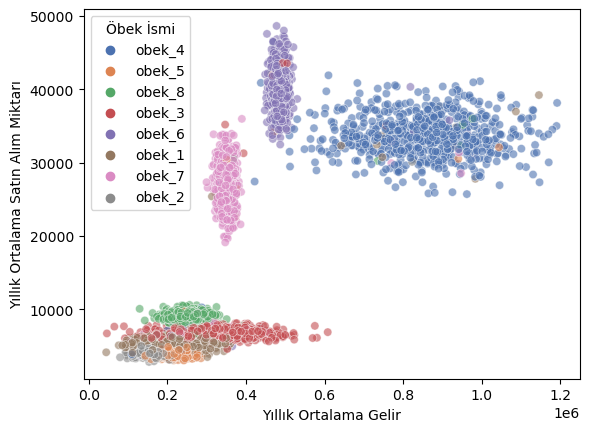

In [63]:
sns.scatterplot(data = train, x = "Yıllık Ortalama Gelir", y = "Yıllık Ortalama Satın Alım Miktarı", hue = "Öbek İsmi", alpha = 0.6, palette="deep")
plt.show()

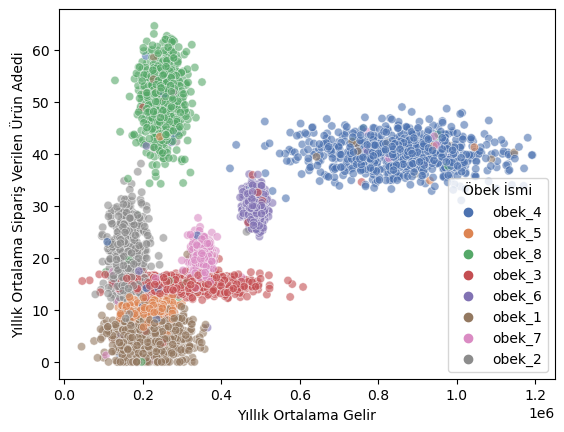

In [64]:
sns.scatterplot(data = train, x = "Yıllık Ortalama Gelir", y = "Yıllık Ortalama Sipariş Verilen Ürün Adedi", hue = "Öbek İsmi", alpha = 0.6, palette = "deep")
plt.show()

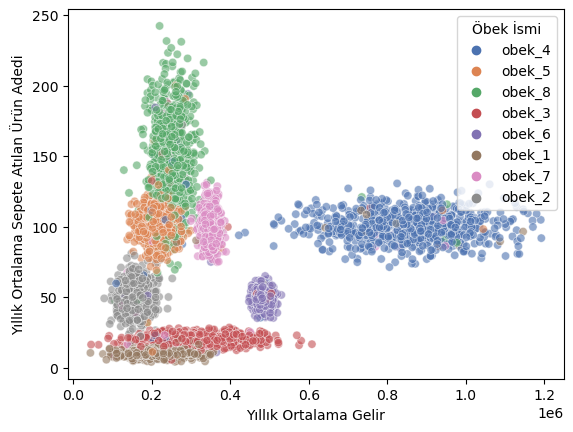

In [65]:
sns.scatterplot(data = train, x = "Yıllık Ortalama Gelir", y = "Yıllık Ortalama Sepete Atılan Ürün Adedi", hue = "Öbek İsmi", alpha = 0.6, palette = "deep")
plt.show()

## t-SNE

In [66]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2 , random_state= 53)
tsne_result = tsne.fit_transform(X)

In [67]:
tsne_result

array([[-96.47518 ,  23.334896],
       [-96.42583 ,  23.272554],
       [-96.56844 ,  23.241405],
       ...,
       [109.56065 ,   5.472164],
       [109.73276 ,   5.503206],
       [109.79857 ,   5.48919 ]], dtype=float32)

In [68]:
tsne_df = pd.DataFrame(data = tsne_result, columns= ['t-SNE Component 1' , 't-SNE Component 2'])
tsne_df['Öbek İsmi'] = y
tsne_df

,t-SNE Component 1,t-SNE Component 2,Öbek İsmi
0,-96.475182,23.334896,obek_4
1,-96.425827,23.272554,obek_5
2,-96.568443,23.241405,obek_8
3,-96.313194,23.117035,obek_3
4,-96.273651,23.035236,obek_3
...,...,...,...
5455,109.752449,5.794170,obek_6
5456,109.574631,5.546061,obek_6
5457,109.560654,5.472164,obek_1
5458,109.732758,5.503206,obek_8


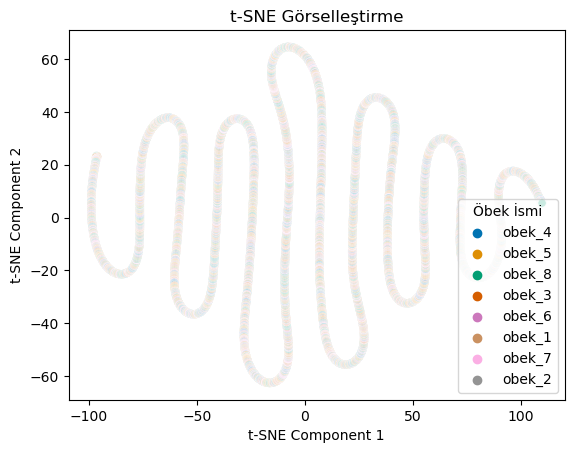

In [69]:
sns.scatterplot(x='t-SNE Component 1', y='t-SNE Component 2', hue='Öbek İsmi', data=tsne_df, palette='colorblind')
plt.title('t-SNE Görselleştirme')
plt.show()

## PCA

In [70]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state= 53)
pca_result = pca.fit_transform(X)

In [71]:
pca_df = pd.DataFrame(data = pca_result, columns = ['PCA Component 1' , 'PCA Component 2'])
pca_df['Öbek İsmi'] = y
pca_df

,PCA Component 1,PCA Component 2,Öbek İsmi
0,-2729.499970,1.916284,obek_4
1,-2728.500009,-0.977215,obek_5
2,-2727.500011,0.205274,obek_8
3,-2726.500001,-0.798130,obek_3
4,-2725.499998,-0.432562,obek_3
...,...,...,...
5455,2725.500021,1.081891,obek_6
5456,2726.500014,0.585487,obek_6
5457,2727.499990,-1.039034,obek_1
5458,2728.499988,0.262188,obek_8


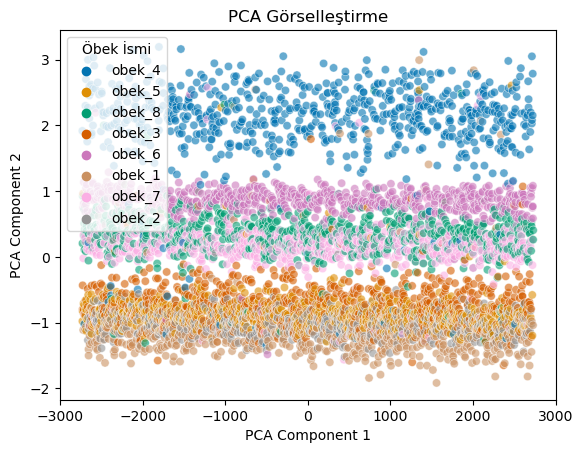

In [72]:
sns.scatterplot(x='PCA Component 1', y='PCA Component 2', hue='Öbek İsmi', data=pca_df, palette='colorblind', alpha = 0.6)
plt.title('PCA Görselleştirme')
plt.show()

## LDA

In [73]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components= 2)
lda_result = lda.fit_transform(X, y)

In [74]:
lda_df = pd.DataFrame(lda_result, columns= ['LDA Component 1' , 'LDA Component 2'])
lda_df['Öbek İsmi'] = y

In [75]:
lda_df

,LDA Component 1,LDA Component 2,Öbek İsmi
0,-2.491916,-2.516622,obek_4
1,2.096780,1.901246,obek_5
2,4.006499,-5.647490,obek_8
3,0.774057,2.759675,obek_3
4,0.600794,2.559857,obek_3
...,...,...,...
5455,-5.823986,-0.838631,obek_6
5456,-5.605749,-0.073672,obek_6
5457,0.699861,3.992466,obek_1
5458,3.543840,-3.760288,obek_8


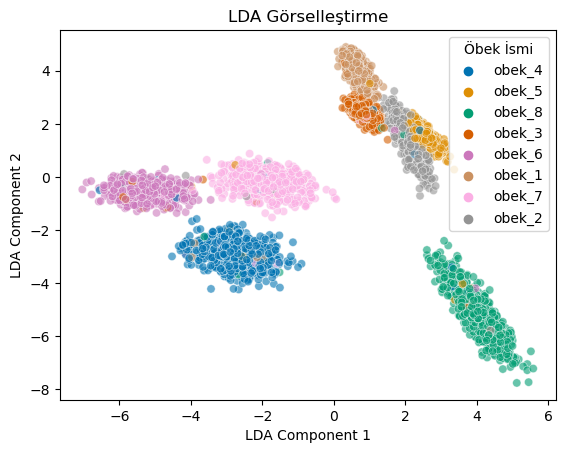

In [76]:
sns.scatterplot(x='LDA Component 1', y='LDA Component 2', hue='Öbek İsmi', data=lda_df, palette='colorblind',alpha=0.6)
plt.title('LDA Görselleştirme')
plt.show()

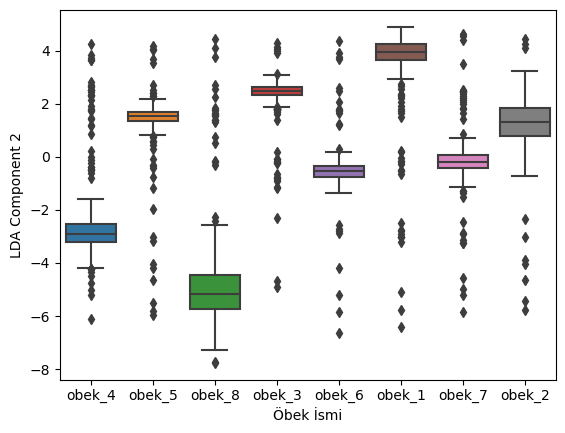

In [77]:
sns.boxplot(x='Öbek İsmi', y='LDA Component 2', data=lda_df)
plt.show()

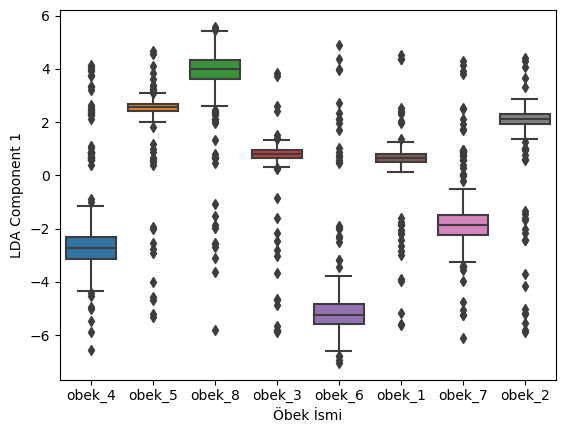

In [78]:
sns.boxplot(x='Öbek İsmi', y='LDA Component 1', data=lda_df)
plt.show()

## KNN

In [79]:
X_LDA = lda.fit_transform(X,y)
test_LDA = lda.transform(test)

In [80]:
X_LDA

array([[-2.49191635, -2.51662222],
       [ 2.09678034,  1.90124581],
       [ 4.00649857, -5.64749024],
       ...,
       [ 0.69986072,  3.9924658 ],
       [ 3.54383984, -3.76028759],
       [ 3.57767392, -4.89540845]])

In [81]:
test_LDA

array([[ 0.94127539,  2.36134992],
       [ 0.97289527,  2.31428896],
       [ 1.63168976,  2.56233881],
       ...,
       [-1.08198327, -0.07814119],
       [ 2.45457618,  1.24974832],
       [-5.12095603, -1.35001186]])

In [82]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors= 2)

In [83]:
knn_model.fit(X_LDA, y)

KNeighborsClassifier(n_neighbors=2)

In [84]:
knn_y_train_pred = knn_model.predict(X_LDA)

In [85]:
knn_y_train_pred

array(['obek_4', 'obek_2', 'obek_8', ..., 'obek_1', 'obek_8', 'obek_8'],
      dtype=object)

In [86]:
from sklearn.metrics import accuracy_score, confusion_matrix , classification_report

accuracy_score(y, knn_y_train_pred)

0.9503663003663003

In [87]:
knn_y_pred = knn_model.predict(test_LDA)

In [88]:
knn_y_pred

array(['obek_3', 'obek_3', 'obek_2', ..., 'obek_7', 'obek_5', 'obek_6'],
      dtype=object)

In [89]:
result = {"id": test.index, "Öbek İsmi": knn_y_pred}

In [90]:
result = pd.DataFrame(result)
result.to_csv("KNN_Results.csv", index=False)

## Run forrest run they fuck your mom

In [91]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components= 2)
lda_result = lda.fit_transform(X, y)

In [92]:
lda_df = pd.DataFrame(lda_result, columns= ['LDA Component 1' , 'LDA Component 2'])
lda_df['Öbek İsmi'] = y

In [93]:
lda_df

,LDA Component 1,LDA Component 2,Öbek İsmi
0,-2.491916,-2.516622,obek_4
1,2.096780,1.901246,obek_5
2,4.006499,-5.647490,obek_8
3,0.774057,2.759675,obek_3
4,0.600794,2.559857,obek_3
...,...,...,...
5455,-5.823986,-0.838631,obek_6
5456,-5.605749,-0.073672,obek_6
5457,0.699861,3.992466,obek_1
5458,3.543840,-3.760288,obek_8


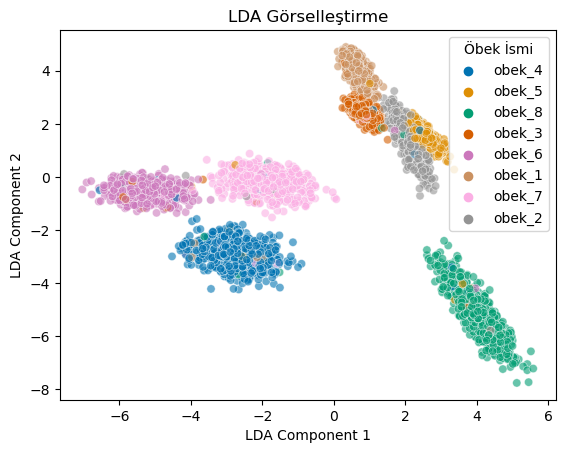

In [94]:
sns.scatterplot(x='LDA Component 1', y='LDA Component 2', hue='Öbek İsmi', data=lda_df, palette='colorblind',alpha=0.6)
plt.title('LDA Görselleştirme')
plt.show()

In [95]:
test_LDA = lda.transform(test)

In [96]:
test_LDA

array([[ 0.94127539,  2.36134992],
       [ 0.97289527,  2.31428896],
       [ 1.63168976,  2.56233881],
       ...,
       [-1.08198327, -0.07814119],
       [ 2.45457618,  1.24974832],
       [-5.12095603, -1.35001186]])

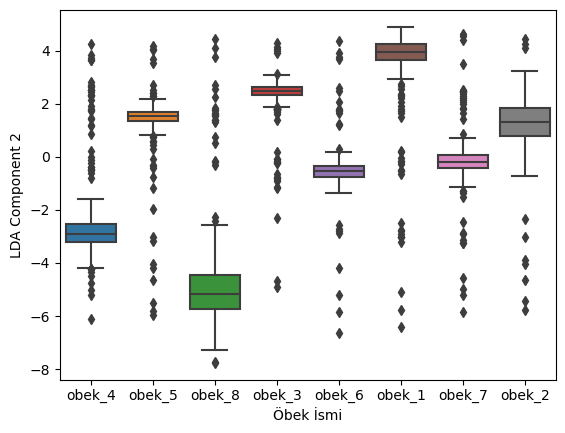

In [97]:
sns.boxplot(x='Öbek İsmi', y='LDA Component 2', data=lda_df)
plt.show()

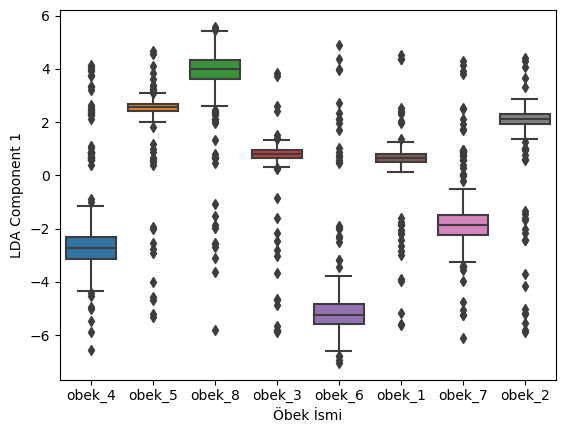

In [98]:
sns.boxplot(x='Öbek İsmi', y='LDA Component 1', data=lda_df)
plt.show()

In [99]:
X = lda_df.drop("Öbek İsmi", axis = 1)
y = lda_df["Öbek İsmi"]

In [100]:
from sklearn.tree import DecisionTreeClassifier

In [101]:
dt_model = DecisionTreeClassifier(criterion = 'entropy',
                                  splitter = 'best',
                                  max_depth = 7,
                                  min_samples_split = 3,
                                  max_features = 5,
                                  random_state = 53
                                  )

In [102]:
dt_model.fit(X , y)

DecisionTreeClassifier(criterion='entropy', max_depth=7, max_features=5,
                       min_samples_split=3, random_state=53)

In [103]:
dt_model_y_train_pred = dt_model.predict(X)

In [104]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [105]:
accuracy_score(y , dt_model_y_train_pred)

0.9512820512820512

In [106]:
print(classification_report(y , dt_model_y_train_pred))

              precision    recall  f1-score   support

      obek_1       0.96      0.96      0.96       692
      obek_2       0.95      0.90      0.92       547
      obek_3       0.95      0.96      0.96       695
      obek_4       0.96      0.94      0.95       720
      obek_5       0.92      0.96      0.94       706
      obek_6       0.95      0.96      0.96       688
      obek_7       0.96      0.95      0.95       695
      obek_8       0.96      0.97      0.97       717

    accuracy                           0.95      5460
   macro avg       0.95      0.95      0.95      5460
weighted avg       0.95      0.95      0.95      5460



In [107]:
from sklearn.model_selection import cross_val_score

In [108]:
dt_model = DecisionTreeClassifier(criterion = 'entropy',
                                  splitter = 'best',
                                  max_depth = 7,
                                  min_samples_split = 3,
                                  max_features = 3,
                                  random_state = 53
                                  )

In [109]:
cross_val_score(dt_model , X , y , cv= 5).mean()

0.9342490842490843

In [110]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [111]:
param_grid = {"n_estimators": [100, 200, 300, 400, 500],
              "criterion" : ['gini'],
              "max_depth" : [3,5,7,9,11],
              "min_samples_split" : [1,2,3,4, 5],
              "max_features" : [3,5,7,9,11],
              "bootstrap": [True],
              "max_samples" : [0.2,0.4,0.5,0.6,0.7]}

In [112]:
rf_model = RandomForestClassifier()

In [113]:
rand_search = RandomizedSearchCV(estimator=rf_model, param_distributions= param_grid, n_iter = 100, cv=5)
rand_search.fit(X, y)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   param_distributions={'bootstrap': [True],
                                        'criterion': ['gini'],
                                        'max_depth': [3, 5, 7, 9, 11],
                                        'max_features': [3, 5, 7, 9, 11],
                                        'max_samples': [0.2, 0.4, 0.5, 0.6,
                                                        0.7],
                                        'min_samples_split': [1, 2, 3, 4, 5],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]})

In [114]:
rf_model = rand_search.best_estimator_

In [115]:
rf_model_y_train_pred = rf_model.predict(X)
rf_model_y_train_pred

array(['obek_4', 'obek_5', 'obek_8', ..., 'obek_1', 'obek_8', 'obek_8'],
      dtype=object)

In [116]:
accuracy_score(y , rf_model_y_train_pred)

0.9483516483516483

In [117]:
print(classification_report(y, rf_model_y_train_pred))

              precision    recall  f1-score   support

      obek_1       0.95      0.95      0.95       692
      obek_2       0.94      0.92      0.93       547
      obek_3       0.94      0.96      0.95       695
      obek_4       0.96      0.94      0.95       720
      obek_5       0.94      0.94      0.94       706
      obek_6       0.95      0.96      0.95       688
      obek_7       0.95      0.95      0.95       695
      obek_8       0.95      0.96      0.96       717

    accuracy                           0.95      5460
   macro avg       0.95      0.95      0.95      5460
weighted avg       0.95      0.95      0.95      5460



In [118]:
cross_val_score(rf_model , X , y , cv= 5).mean()

0.9435897435897436

In [119]:
rf_model_y_pred = rf_model.predict(test_LDA)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [120]:
rf_model_y_pred

array(['obek_3', 'obek_3', 'obek_2', ..., 'obek_7', 'obek_5', 'obek_6'],
      dtype=object)

In [121]:
result = {"id": test.index, "Öbek İsmi": rf_model_y_pred}

In [122]:
result = pd.DataFrame(result)
result.to_csv("RF_Results.csv", index=False)